In [1]:
import numpy as np

from src.dataset import Dataset
from src.fit.kineticmodel import FirstOrderModel

import matplotlib.pyplot as plt


# fname = "/Users/dominikmadea/Documents/Python + JS/pyTSA/gui/src/plotter/wasm/FLD_DMRK23-3E+MB in MeOH.csv"
# fname = r"C:\Users\domin\OneDrive - OIST\Projects\Test files\Femto\2023_08_07_3Z_MeOH_387_01-avrg.txt"
fname = "/Users/dominikmadea/Library/CloudStorage/OneDrive-OIST/Projects/Test files/Femto/2023_08_07_3Z_MeOH_387_01-avrg.txt"
fname = "/Users/dominikmadea/Library/CloudStorage/OneDrive-OIST/Projects/Heptazines + femto/Transient spectroscopy/fsTA/20231212/HAP-3tBuTPA toluene degassed.txt"
fname = "/Users/dominikmadea/Library/CloudStorage/OneDrive-OIST/Projects/Heptazines + femto/Transient spectroscopy/PicoTAS/20231212/HAP-3tBuTPA in toluene degassed-bcorr.txt"


/Users/dominikmadea/Documents/Python + JS/pyTSA/pyTSA/src/plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


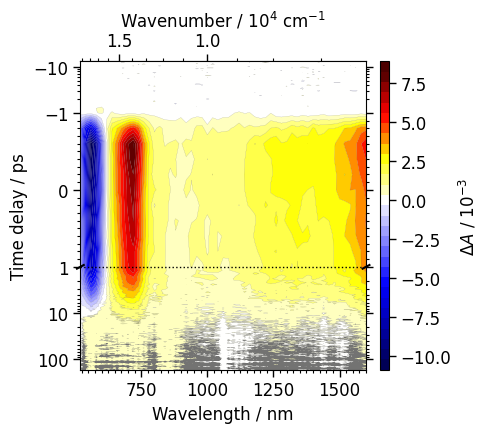

In [2]:
d = Dataset.from_file(fname, delimiter='\t', transpose=True)
model = FirstOrderModel()
d.set_model(model)
d.plot_data(plot_chirp_corrected=False, symlog=True)

In [3]:
model.update_options(n_species=2, include_chirp=False, include_irf=True, include_artifacts=False, num_of_exp_chirp_params=1)
# model.estimate_chirp([500, 600, 700, 800], [-1, -0.6, -0.5, -0.4])
model.params['tau_1'].value = 2
model.params['tau_2'].value = 5000
model.params['t0'].value = -1

model.params


name,value,initial value,min,max,vary
t0,-1.00000000,0,-inf,inf,True
FWHM,0.15000000,0.15,0.00000000,inf,True
tau_1,2.00000000,0.1,0.00000000,inf,True
tau_2,5000.00000,1,0.00000000,inf,True


In [4]:
model.fit()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5655e-03                                    4.35e-03    
       1              2         8.5001e-04      7.15e-04       3.44e+03       8.70e-04    
       2              3         6.7899e-04      1.71e-04       7.61e+02       1.68e-04    
       3              4         6.4797e-04      3.10e-05       1.62e+02       5.16e-05    
       4              5         6.4074e-04      7.23e-06       8.27e+00       3.09e-05    
       5              6         6.3985e-04      8.91e-07       4.98e-01       9.17e-06    
       6              7         6.3976e-04      9.21e-08       8.49e-02       1.16e-06    
       7              8         6.3975e-04      9.04e-09       3.87e-02       6.76e-08    
       8              9         6.3975e-04      7.70e-10       1.17e-02       8.06e-08    
       9             10         6.3975e-04      2.15e-11       3.66e-03       1.28e-08    

In [5]:
model.params

name,value,standard error,relative error,initial value,min,max,vary
t0,-0.82377080,0.00771010,(0.94%),-1,-inf,inf,True
FWHM,0.14111864,0.04412419,(31.27%),0.15,0.00000000,inf,True
tau_1,4.39028059,0.01657399,(0.38%),2,0.00000000,inf,True
tau_2,629.760023,17.1252716,(2.72%),5000,0.00000000,inf,True


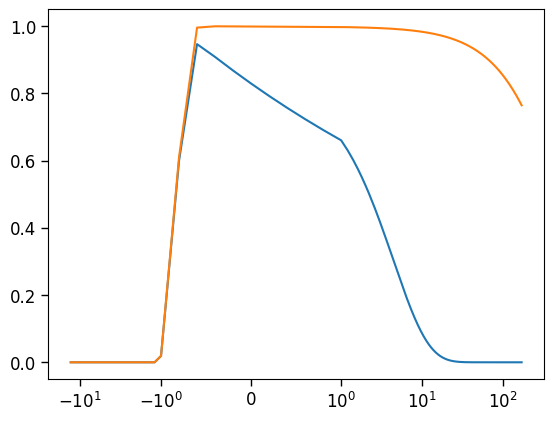

In [6]:
model.params['FWHM'].value = 0.2

model.simulate()

plt.plot(d.times, model.C_opt)
plt.xscale('symlog', linthresh=1)

plt.show()

# plt.plot(d.wavelengths, model.ST_artifacts.T)
# plt.show()

/Users/dominikmadea/Documents/Python + JS/pyTSA/pyTSA/src/plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


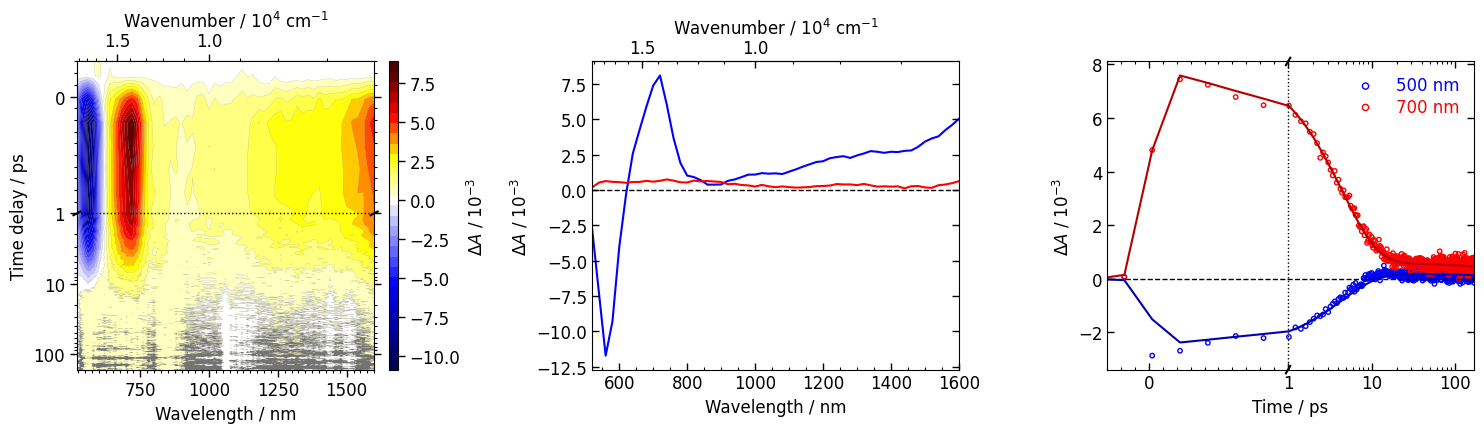

In [7]:
d.matrix.shape, model.matrix_opt.shape


# d.plot_fit_femto(wls_fit=(500, 700), plot_chirp_corrected=False, draw_chirp=True, offset_before_zero=2, t_lim=(-2, None))
d.plot_fit_femto(wls_fit=(500, 700), plot_chirp_corrected=True)


# d.plot_data(symlog=True, plot_chirp_corrected=False, draw_chirp=True)

/Users/dominikmadea/Documents/Python + JS/pyTSA/pyTSA/src/plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


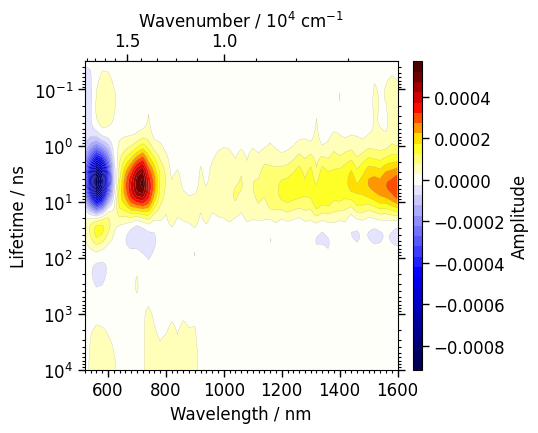

In [9]:
lifetimes = np.logspace(-1.5, 4, 100)
LDM, fit = model.calculate_LDM(lifetimes, 5)
d.plot_LDM(squeeze_z_range_factor=1, fig_size=(5.5, 4.5), t_unit='ns')